In [49]:
from torch.utils.data import DataLoader
import sys
sys.path.append('../')
from src.datasets import Physionet2012, dict_collate_fn

In [116]:

dataset = Physionet2012(split='training')
dataset_loader = DataLoader(dataset, batch_size=16, collate_fn=dict_collate_fn,
                        shuffle=False, pin_memory=True)

In [51]:
batch = next(iter(dataset_loader))

In [52]:
batch.keys() # dict of following keys containing each a tensor

dict_keys(['time', 'values', 'label'])

In [5]:
# tensor shape: [bs, distinct times, channels]
batch['values'].shape #contains nans for invalid points (no measurement at given time and channel)

torch.Size([16, 125, 36])

In [21]:
# time steps of the first instance of batch #for shorter instance (eg. instance 1) this is 
# padded with zeros for tensor compatibility

batch['time'][0].shape

torch.Size([125, 1])

In [122]:
dataset[0]['time'].shape

(125, 1)

In [117]:
dataset[0]['label']

array([0.], dtype=float32)

{'time': array([[ 0.       ],
        [ 0.25     ],
        [ 1.4166666],
        [ 2.0333333],
        [ 2.4166667],
        [ 2.8666666],
        [ 3.0333333],
        [ 3.8666666],
        [ 3.9      ],
        [ 3.9833333],
        [ 4.0666666],
        [ 4.15     ],
        [ 4.233333 ],
        [ 4.3166666],
        [ 4.4      ],
        [ 4.4666667],
        [ 4.483333 ],
        [ 4.5666666],
        [ 4.65     ],
        [ 4.733333 ],
        [ 4.8166666],
        [ 4.9      ],
        [ 4.983333 ],
        [ 5.0666666],
        [ 5.15     ],
        [ 5.233333 ],
        [ 5.25     ],
        [ 5.4      ],
        [ 5.4666667],
        [ 6.4      ],
        [ 6.4666667],
        [ 6.65     ],
        [ 6.9      ],
        [ 7.15     ],
        [ 7.1666665],
        [ 7.4      ],
        [ 8.166667 ],
        [ 8.4      ],
        [ 8.9      ],
        [ 8.983334 ],
        [ 9.066667 ],
        [ 9.15     ],
        [ 9.4      ],
        [ 9.883333 ],
        [ 9.9      ],
  

In [34]:
dataset[0]['label']

array([0.], dtype=float32)

In [69]:
#Imports for UEA dataset class:

import os
import pandas as pd
import numpy as np

from src.datasets import Dataset
from src.datasets.utils import DATA_DIR
import uea_ucr_datasets #requires the data in ~/.data/UEA_UCR

# from ..tasks import BinaryClassification
from src.datasets.mimic_benchmarks_utils import Normalizer
from src.datasets.utils import DATA_DIR

DATASET_BASE_PATH = os.path.join(DATA_DIR, 'UEA_UCR')


In [57]:
uea_ucr_datasets.list_datasets()
dataset = 'PenDigits'  #'PhonemeSpectra' #'SpokenArabicDigits' #'UWaveGestureLibrary'
d = uea_ucr_datasets.Dataset(dataset, train=True)
first_instance = d[0]
instance_x, instance_y = first_instance

In [111]:
X = []; y = []
for i, (instance_x, instance_y) in enumerate(d):
    X.append(instance_x)
    y.append(instance_y)
X = np.array(X); y = np.array(y)

array([array([[ 47., 100.],
       [ 27.,  81.]], dtype=float32),
       array([[  0.,  89.],
       [ 27., 100.],
       [ 42.,  75.],
       [ 29.,  45.],
       [ 15.,  15.],
       [ 37.,   0.],
       [ 69.,   2.],
       [100.,   6.]], dtype=float32),
       array([[  0.,  57.],
       [ 31.,  68.],
       [ 72.,  90.],
       [100., 100.],
       [ 76.,  75.],
       [ 50.,  51.],
       [ 28.,  25.],
       [ 16.,   0.]], dtype=float32),
       ...,
       array([[100.,  98.],
       [ 60., 100.],
       [ 24.,  87.],
       [  3.,  58.],
       [ 35.,  51.],
       [ 58.,  26.],
       [ 36.,   0.],
       [  0.,   5.]], dtype=float32),
       array([[ 59.,  65.],
       [ 91., 100.],
       [ 84.,  96.],
       [ 72.,  50.],
       [ 51.,   8.],
       [  0.,   0.],
       [ 45.,   1.],
       [100.,   0.]], dtype=float32),
       array([[  0.,  78.],
       [ 29., 100.],
       [ 94.,  86.],
       [ 70.,  48.],
       [ 42.,  11.],
       [ 32.,   0.],
       [ 25.,  36.],


In [140]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
sss.get_n_splits(Z, y)

1

In [141]:
train_index, test_index = next(sss.split(Z, y))

In [142]:
Z = np.arange(len(y))

array([3700, 4987,  892, ..., 5871, 5874, 1057])

array([   0,    1,    2, ..., 7491, 7492, 7493])

In [103]:
train_index, test_index

(array([3700, 4987,  892, ..., 5871, 5874, 1057]),
 array([1442, 2190, 3894, ..., 4154, 2999, 2051]))

(array([156., 156., 156., 144., 156., 144., 144., 155., 144., 144.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

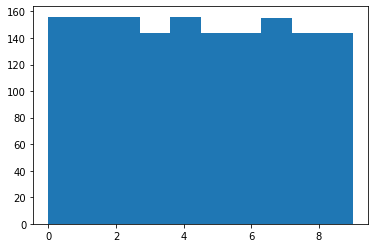

In [102]:
import matplotlib.pyplot as plt
plt.hist(y[test_index])


TypeError: only integer scalar arrays can be converted to a scalar index

In [197]:
#Imports for UEA dataset class:
import pickle
import os
import pandas as pd
import numpy as np
from tqdm import trange

from src.datasets import Dataset
from src.datasets.utils import DATA_DIR
import uea_ucr_datasets #requires the data in ~/.data/UEA_UCR

# from ..tasks import BinaryClassification
from src.datasets.mimic_benchmarks_utils import Normalizer
from src.datasets.utils import DATA_DIR

DATASET_BASE_PATH = os.path.join(DATA_DIR, 'UEA')

class UEADataReader():
    """UEA Data Reader to read and return instances of given split."""
    def __init__(self, dataset_name, split, out_path):
        uea_ucr_datasets.list_datasets()
        if split == 'testing':
            data = uea_ucr_datasets.Dataset(dataset_name, train=False)
            self.X, self.y = _to_array(data)
        elif split in ['training', 'validation']:
            validation_split_file = os.path.join(out_path, 'validation_split_file.pkl')
            data = uea_ucr_datasets.Dataset(dataset_name, train=True)
            X, y = _to_array(data)
            if not os.path.isfile(validation_split_file):
                print('Generating stratified training/validation split...')
                #now create the splits:
                from sklearn.model_selection import StratifiedShuffleSplit
                sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
                #X_dummy = np.zeros([len(y),2])
                sss.get_n_splits(X, y) #for simpler NaN handling, we use dummy data for splitting, 
                #as only labels are relevant
                
                training_indices, validation_indices = next(sss.split(X, y))
                split_dict = {'training': training_indices,
                              'validation': validation_indices
                }
                #save the split ids
                if not os.path.exists(out_path):
                    os.makedirs(out_path, exist_ok=True)
                with open(validation_split_file, 'wb') as f:
                    pickle.dump(split_dict, f )#protocol=pickle.HIGHEST_PROTOCOL)
            else:
                print('Loading stratified training/validation split.')
                with open(validation_split_file, 'rb') as f:
                    split_dict = pickle.load(f)
            indices = split_dict[split]
            self.X = X[indices] #subsetting the split
            self.y =  y[indices] 
        else:
            raise ValueError('Provided split not available.', 
                             'Use any of [training, validation, testing]'
                            )
    def read_example(self, index):
        return {'X': self.X[index], 'y': self.y[index]}
    def get_number_of_examples(self):
        return len(self.X)
        
        
class UEADataset(Dataset):
    """UEA Dataset Class to load any UEA dataset."""

    #Here, the normalizer config path is still abstract, to be formatted later:
    normalizer_config = os.path.join(
        #os.path.dirname(__file__), #hard code for now as not possible to use it here
        '/Users/mimoor/Desktop/localwork/Signatures/GP_Signatures/src/datasets',
        'resources',
        '{}Dataset_normalization.json'
    )
    
    def __init__(self, dataset_name, split, transform=None, data_path=DATASET_BASE_PATH):
        """Initialize dataset.

        Args:
            dataset_name: Name of UEA dataset to load.
                [ PenDigits, .. ] 
            split: Name of split. One of `training`, `validation`, `testing`.
            data_path: Path to data. Default:
                {project_root_dir}/data/UEA

        """
        self.data_path = os.path.join(data_path, dataset_name)

        #self.dataset = uea_ucr_datasets.Dataset(dataset_name, train=True)
        self.reader = UEADataReader(dataset_name, split, self.data_path)
        self.normalizer_config = self.normalizer_config.format(dataset_name)
        self.normalizer = Normalizer()
        self._set_properties()        
        
        if not os.path.exists(self.normalizer_config):
            print(f'Normalizer config {self.normalizer_config} not found!')
            print('Generating normalizer config...')
            if split != 'training':
                # Only allow to compute normalization statics on training split
                raise ValueError(
                    'Not allowed to compute normalization data '
                    'on other splits than training.'
                )
            for i in trange(len(self)):
                instance = self.reader.read_example(i)['X']
                self.normalizer._feed_data(instance)
            self.normalizer._save_params(self.normalizer_config)
        else:
            self.normalizer.load_params(self.normalizer_config)

        self.maybe_transform = transform if transform else lambda a: a
    
    def _set_properties(self):
        self.has_unaligned_measurements = False
        self.statics = None
        self.n_statics = 0
        instance = self.reader.read_example(0)
        self._measurement_dims = instance['X'].shape[1]

    @property
    def n_classes(self):
        """
        Refering to multi-label settings (conforming with other pipelines)
        """
        return 1 
    
    @property
    def n_class_types(self):
        """
        Given single-label settings, how many classes / class manifestations of this label
        """
        distinct_labels = np.unique(self.reader.y)
        return len(distinct_labels)

    @property
    def measurement_dims(self):
        return self._measurement_dims
    
    def __len__(self):
        return self.reader.get_number_of_examples()
    
    def __getitem__(self, index):
        instance = self.reader.read_example(index)
        features = self.normalizer.transform(instance['X'])
        label = instance['y']
        if self.n_classes == 1:
            # Add an additional dimension to the label if it is only a scalar.
            # This makes it confirm more to the treatment of multi-class
            # targets.
            label = [label]
        label = np.array(label, dtype=np.float32)
        time = np.array(np.arange(features.shape[0]), dtype=np.float32)[:, None]
        features = np.array(features, dtype=np.float32)
        return self.maybe_transform(
            {'time': time, 'values': features, 'label': label})

    
def _to_array(data):
        """
        Util function to convert iterable dataset to X,y arrays for stratified splitting
        """
        X = []; y = []
        for instance_x, instance_y in data:
            X.append(instance_x)
            y.append(instance_y)
        X = np.array(X)
        y = np.array(y)
        return X, y 

In [200]:
dataset_name = 'PenDigits'
dataset = UEADataset(dataset_name, split='test')

ValueError: ('Provided split not available.', 'Use any of [training, validation, testing]')

10

In [62]:
class Physionet2012Dataset(Dataset):
    """Dataset of the PhysioNet 2012 Computing in Cardiology challenge."""

    normalizer_config = os.path.join(
        os.path.dirname(__file__),
        'resources',
        'Physionet2012Dataset_normalization.json'
    )

    def __init__(self, split, transform=None, data_path=DATASET_BASE_PATH):
        """Initialize dataset.

        Args:
            split: Name of split. One of `training`, `validation`, `testing`.
            data_path: Path to data. Default:
                {project_root_dir}/data/physionet_2012

        """
        self.data_path = data_path
        split_dir, split_file = self._get_split_path(split)

        self.reader = PhysionetDataReader(split_dir, split_file)
        self.feature_transform = PhysionetFeatureTransform()
        self.normalizer = Normalizer()
        self._set_properties()

        if not os.path.exists(self.normalizer_config):
            print(f'Normalizer config {self.normalizer_config} not found!')
            print('Generating normalizer config...')
            if split != 'training':
                # Only allow to compute normalization statics on training split
                raise ValueError(
                    'Not allowed to compute normalization data '
                    'on other splits than training.'
                )
            for i in trange(len(self)):
                instance = self.reader.read_example(i)['X']
                transformed = self.feature_transform(instance)
                self.normalizer._feed_data(transformed[1])
            self.normalizer._save_params(self.normalizer_config)
        else:
            self.normalizer.load_params(self.normalizer_config)

        self.maybe_transform = transform if transform else lambda a: a

    def _get_split_path(self, split):
        split_paths = {
            'training': (
                os.path.join(self.data_path, 'train'),
                os.path.join(self.data_path, 'train_listfile.csv')
            ),
            'validation': (
                os.path.join(self.data_path, 'train'),
                os.path.join(self.data_path, 'val_listfile.csv')
            ),
            'testing': (
                os.path.join(self.data_path, 'test'),
                os.path.join(self.data_path, 'test_listfile.csv')
            )
        }
        return split_paths[split]

    def _set_properties(self):
        self.has_unaligned_measurements = True
        self.statics = None
        self.n_statics = 0
        instance = self.reader.read_example(0)
        times, features = self.feature_transform(instance['X'])
        self._measurement_dims = features.shape[1]

    @property
    def n_classes(self):
        return 1

    @property
    def measurement_dims(self):
        return self._measurement_dims

    def __len__(self):
        return self.reader.get_number_of_examples()

    def __getitem__(self, index):
        instance = self.reader.read_example(index)
        t, features = self.feature_transform(instance['X'])
        features = self.normalizer.transform(features)
        label = instance['y']
        if self.n_classes == 1:
            # Add an additional dimension to the label if it is only a scalar.
            # This makes it confirm more to the treatment of multi-class
            # targets.
            label = [label]
        label = np.array(label, dtype=np.float32)
        time = np.array(t, dtype=np.float32)[:, None]
        features = np.array(features, dtype=np.float32)
        return self.maybe_transform(
            {'time': time, 'values': features, 'label': label})

NameError: name 'Dataset' is not defined